In [121]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_confusion_matrix, classification_report
from nltk import agreement

import pandas as pd
import numpy as np


In [37]:
"DONE-Iterasi 1_#1-300_celine.conll".split("_")[1]

'#1-300'

In [122]:
import os
rootdir='.\\'
paths=list()
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".conll") and file.startswith("DONE"):
            paths.append(filepath)

print(paths)

['.\\raw_iter1\\DONE-Iterasi 1_#1-300_celine.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1-300_sari.conll', '.\\raw_iter1\\DONE-Iterasi 1_#2500-3000_dini.conll', '.\\raw_iter1\\DONE-Iterasi 1_#2500-3000_yasmin.conll', '.\\raw_iter1\\DONE-Iterasi 1_#300-600_Ale.conll', '.\\raw_iter1\\DONE-Iterasi 1_#300-600_oci.conll', '.\\raw_iter1\\DONE-Iterasi 1_#600-900_ale.conll', '.\\raw_iter1\\DONE-Iterasi 1_#600-900_nadhir.conll', '.\\raw_iter1\\DONE-Iterasi 1_#900-1400_dinda.conll', '.\\raw_iter1\\DONE-Iterasi 1_#900-1400_fadil.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3000-3300_Celine.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3000-3300_Sari.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3300-3600_Nadhir.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3300-3600_Oci.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3600-4000_Ale.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3600-4000_Fadil.conll', '.\\raw_iter2\\DONE-Iterasi 2_#4300_4800_Dinda.conll', '.\\raw_iter2\\DONE-Iterasi 2_#4300_4800_Kholifah.conll', '.\\raw_iter2\\DONE-Iterasi 2_#4

In [123]:
c=0
dfs=list()
for i in range(0,len(paths)-2,2):
    if i%2==0:
        print(paths[i],paths[i+1])
        temp_df=merge_two_df(paths[i],paths[i+1])
        # print(sorted(temp_df.annotator_1.unique()))
        # print(sorted(temp_df.annotator_2.unique()))
        dfs.append(temp_df)
final_df=pd.concat(dfs)
# final_df

.\raw_iter1\DONE-Iterasi 1_#1-300_celine.conll .\raw_iter1\DONE-Iterasi 1_#1-300_sari.conll
.\raw_iter1\DONE-Iterasi 1_#2500-3000_dini.conll .\raw_iter1\DONE-Iterasi 1_#2500-3000_yasmin.conll
.\raw_iter1\DONE-Iterasi 1_#300-600_Ale.conll .\raw_iter1\DONE-Iterasi 1_#300-600_oci.conll
.\raw_iter1\DONE-Iterasi 1_#600-900_ale.conll .\raw_iter1\DONE-Iterasi 1_#600-900_nadhir.conll
.\raw_iter1\DONE-Iterasi 1_#900-1400_dinda.conll .\raw_iter1\DONE-Iterasi 1_#900-1400_fadil.conll
.\raw_iter2\DONE-Iterasi 2_#3000-3300_Celine.conll .\raw_iter2\DONE-Iterasi 2_#3000-3300_Sari.conll
.\raw_iter2\DONE-Iterasi 2_#3300-3600_Nadhir.conll .\raw_iter2\DONE-Iterasi 2_#3300-3600_Oci.conll
.\raw_iter2\DONE-Iterasi 2_#3600-4000_Ale.conll .\raw_iter2\DONE-Iterasi 2_#3600-4000_Fadil.conll
.\raw_iter2\DONE-Iterasi 2_#4300_4800_Dinda.conll .\raw_iter2\DONE-Iterasi 2_#4300_4800_Kholifah.conll
.\raw_iter2\DONE-Iterasi 2_#4800-5300_Dini.conll .\raw_iter2\DONE-Iterasi 2_#4800-5300_Haikal.conll
.\raw_iter2\DONE-Iteras

In [119]:
cohen_kappa_score(final_df.annotator_1,final_df.annotator_2)

0.9467472885749235

[[   408      0      1      0      3      0      8      0      0      0
       0      1     77]
 [     1   1586     10      3      0      0      2     13      4      1
       1      0     28]
 [     1     19   1346      5     15      1      6      3     13      6
       1      1     59]
 [     1      0      5   3937      1      1      1      0      2     30
       1      2    130]
 [     2      0     11      1   2689      0      0      0      1      3
      22      0     17]
 [     0      4      1      0      2     92      1      0      0      0
       1      0      9]
 [     8      4      2      0      1      0    627      2      0      0
       1      2     41]
 [     0      7      1      3      0      0      0    668      7      5
       0      0      9]
 [     2      4      5      2      0      0      5     14    759      5
       0      1     28]
 [     0      1      0      9      1      0      1      0      4   2282
       1      1     33]
 [     0      0      0      1      2    

<AxesSubplot:>

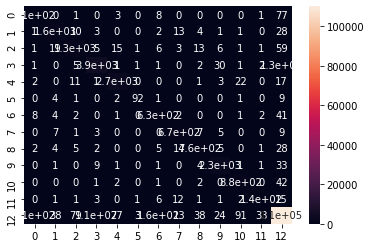

In [139]:
import seaborn as sns
cm=confusion_matrix(final_df.annotator_1, final_df.annotator_2)
print(cm)
sns.heatmap(cm, annot=True)

In [129]:
coder1_new = []
coder2_new = []
for i in range(len(final_df.annotator_1.values)):
    coder1_new.append([1,i,final_df.annotator_1.values[i]])
    coder2_new.append([2,i,final_df.annotator_2.values[i]])


formatted_codes = coder1_new + coder2_new

# formatted_codes = [ [final_df.annotator_1.values[i],final_df.annotator_2.values[i]] for i in range(len(final_df.annotator_1))]

In [133]:
ratingtask = agreement.AnnotationTask(data=formatted_codes)

print('Cohen\'s Kappa:',ratingtask.kappa())
print('Cohen\'s Weighted Kappa:',ratingtask.weighted_kappa())
print('Fleiss\'s Kappa:',ratingtask.multi_kappa())
print('Krippendorff\'s Kappa:',ratingtask.alpha())


Cohen's Kappa: 0.9467472885749234
Cohen's Weighted Kappa: 0.9467472885749235
Fleiss's Kappa: 0.9467472885749234
Krippendorff's Kappa: 0.9467470923768434


In [59]:
final_df[final_df.annotator_1!=final_df.annotator_2].groupby('tweet_id').count()

,token,index,annotator_1,annotator_2
tweet_id,,,,
1380716397886533633,1,1,1,1
1380729945752674307,1,1,1,1
1380761194525433859,2,2,2,2
1380767147387850758,3,3,3,3
1380772732963487747,1,1,1,1
...,...,...,...,...
1391510684387528707,1,1,1,1
1391511690445950977,3,3,3,3
1391567799068200963,3,3,3,3


In [57]:
def conll_to_pd(path):
    result=list()
    x='?.!,-~!$%&()*+,-./:;<=>?[\]^_`{|}~'
    f = open(path,"r", encoding='utf-8') 
    sym=''
    c= 0
    index=0
    for line in f.readlines():
        # try:
        line_split=line.split(" ")
        n_token=len(line_split)
        token=line_split[0]
        # print(n_token)
        ner=line_split[-1].replace("\n","")
        
        # skip unwanted parts of the data
        if len(token.strip())==0 or token=="-DOCSTART-": 
            # print(token)
            continue
        elif token.isdigit() and len(str(token))==19:
            id=token
            index= 0
        else:
            # if (index==0 and token[0]=='"'):# or index==n_token-1 or index==n_token:
            #     print(token,n_token)
            #     continue
            if len(token)>1 and any(c.isalpha() for c in token)  and ((token[0] in '\'"' and token[-1] not in '\'"') or token[0] in x):
                sym=token[0]
                token=token[1:].strip(x)
                result.append({'token':sym, 'ner':'O', 'tweet_id':id, 'index':index})
                index+=1
                n_token+=1

            if len(token)>1 and any(c.isalpha() for c in token) and ((token[0] not in '\'"' and token[-1] in '\'"') or token[-1] in x):
                sym=token[-1]
                token=token[:-1].strip(x)
                result.append({'token':token, 'ner':ner, 'tweet_id':id, 'index':index})
                index+=1
                n_token+=1
                result.append({'token':sym, 'ner':'O', 'tweet_id':id, 'index':index})
            else:
                result.append({'token':token, 'ner':ner, 'tweet_id':id, 'index':index})
            index+=1
    df_result = pd.DataFrame(result)
    remove_index= list(df_result.groupby(['tweet_id']).index.idxmin())
    remove_index.extend(list(df_result.groupby(['tweet_id']).index.idxmax()))
    df_result.drop(remove_index, inplace=True)
    df_result.reset_index(drop=True,inplace=True)
    df_result["index"]=df_result["index"]-1
    return df_result

In [58]:
def merge_two_df(path1,path2):
    df1=conll_to_pd(path1)
    df2=conll_to_pd(path2)
    if df1.shape == df2.shape:
        df1.rename(columns={'ner':'annotator_1'},inplace=True)
        df1['annotator_2']=df2.ner
        df1=df1[['tweet_id','token','index','annotator_1', 'annotator_2']]
        return df1
    return None